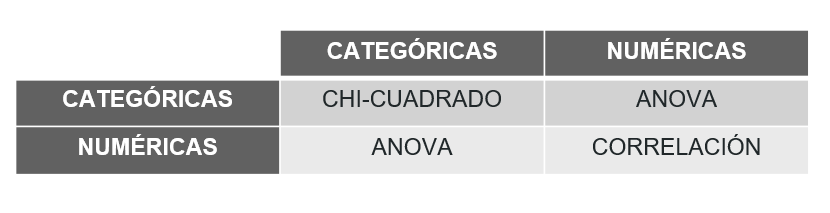

# 1. Test Chi-Cuadrado
Este test estadístico determina si dos variables categóricas son dependientes o independientes. 
Por ejemplo, se realiza una encuesta aleatoria a diferentes personas en diferentes rangos de edades, preguntándoles su preferencia política, y se obtienen los siguientes resultados:

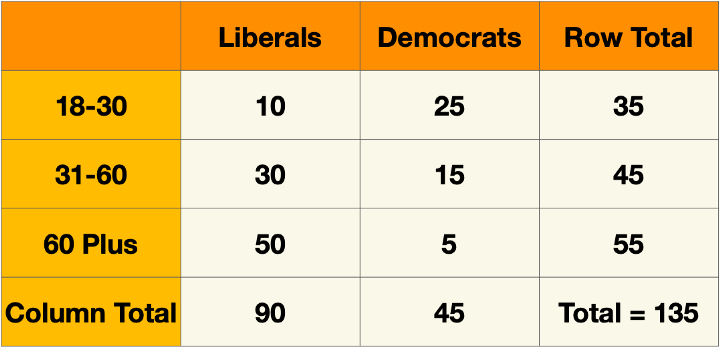

**1. Definición de hipótesis**  

$H_0$: La edad no influye en el partido político en el que se vota (las dos variables son independientes)  
$H_1$: La edad sí influye en el partido político (las dos variables son dependientes)

**2. Grados de libertad y valor crítico** 

Se calculan a partir de la tabla de contingencia como (nº de filas-1) x (nº de columnas -1).   
En este caso: $(3-1)\times (2-1)=2$  

Buscamos en la [tabla de chi-cuadrado](https://people.richland.edu/james/lecture/m170/tbl-chi.html) el valor crítico para esos grados de libertad. En este caso, para un nivel de confianza del 95% y 2 grados de libertad, tenemos $5.991$. Si el valor del test estadístico supera ese valor crítico, podremos rechazar la hipótesis nula afirmar con suficiente confianza que ambas variables son dependientes y están relacionadas.

**3. Cálculo del estadístico**
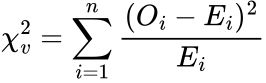

El valor esperado se calcula como el total de cada fila y cada columna en la tabla de contingencia. Por ejemplo, el valor esperado para el grupo de edad 18-30 que votan a los liberales es: 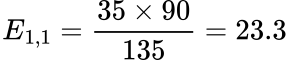

Realizando el cálculo para cada valor esperado, obtenemos el valor del estadístico chi-cuadrado:   

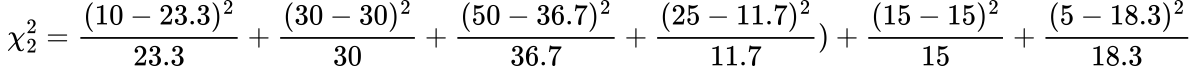
  
   
El resultado es igual a $37.2$, mucho mayor que el valor crítico de $5.991$, por tanto podemos rechazar la hipótesis nula (ambas variables están relacionadas)

### Ejemplo
Vamos a leer un dataset de pasajeros del Titanic y analizar si hay relación entre las diferentes clases de los pasajeros (primera clase, segunda, etc.) y la supervivencia.  

No es necesario realizar todos los pasos, ya que la librería `scipy.stats` nos permite implementar el test chi-cuadrado con la función `chi2_contingency` 

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
pd.crosstab(data.Pclass, data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [6]:
from scipy.stats import chi2_contingency


chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(data.Pclass, data.Survived))

print('Chi-cuadrado:',chi2)
print('p-valor:',p_value)
print('Grados de libertad:',dof)

Chi-cuadrado: 102.88898875696056
p-valor: 4.549251711298793e-23
Grados de libertad: 2


In [7]:
pasion = pd.read_excel(r"C:\Users\rzambrano\Documents\THE BRIDGE 22_23\pasion.xlsx")
pasion

,Nombre,Pasión,Género
0,Víctor Bandin,Media,H
1,Miguel Calvín Rey,Media,H
2,Driss,Baja,H
3,Agustin Gerome,Baja,H
4,Valentina Gonzalez Gallego,Baja,M
5,Diana Hernández Bounina,Baja,M
6,Inma Jimenez,Media,M
7,Rosa L.G.,Baja,M
8,Esteban Mangado Pontes,Alta,H
9,Jorge Marchán Torres,Baja,H


In [8]:
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(pasion['Pasión'], pasion['Género']))

print('Chi-cuadrado:',chi2)
print('p-valor:',p_value)
print('Grados de libertad:',dof)

Chi-cuadrado: 7.037193575655112
p-valor: 0.029640998609961087
Grados de libertad: 2


In [9]:
pd.crosstab(pasion['Pasión'], pasion['Género'])

Género,H,M
Pasión,,
Alta,5,0
Baja,4,9
Media,4,3


In [11]:
pd.DataFrame(expected)

,0,1
0,2.60,2.40
1,6.76,6.24
2,3.64,3.36


# 2. ANOVA

Utilizado para comprobar la relación entre variables numéricas y categóricas (con al menos 3 categorías). En caso de que solo tengamos dos categorías, podemos utilizar un t-test.  

Por ejemplo, se realiza un experimento en el que se ofrecen diferentes bebidas a una serie de personas, y después se mide el tiempo de reacción en una determinada tarea. Se desea conocer si ambas variables (tipo de bebida y tiempo de reacción) están relacionadas

In [12]:
df = pd.read_csv('data/drinks.csv')
df

,team,drink_type,reaction_time
0,1,water,14
1,2,water,25
2,3,water,23
3,4,water,27
4,5,water,28
5,6,water,21
6,7,water,26
7,8,water,30
8,9,water,31
9,10,water,34


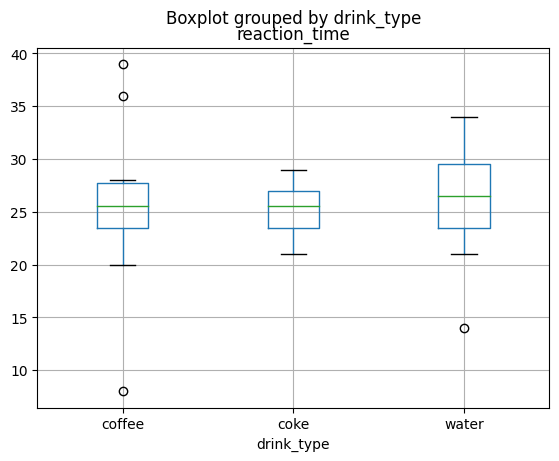

In [14]:
df.boxplot('reaction_time',by='drink_type');

**1. Definición de hipótesis**  

$H_0$: No hay diferencia entre las medias de las categorías  
$H_1$: Al menos un tipo de bebida se diferencia significativamente de la media general de la variable dependiente

**2. Calcular la media para cada categoría**

In [15]:
df2 = df.pivot(columns='drink_type', index='team')
df2

reaction_time           
drink_type        coffee coke water
team                               
1                      8   25    14
2                     20   26    25
3                     26   27    23
4                     36   29    27
5                     39   25    28
6                     23   23    21
7                     25   22    26
8                     28   27    30
9                     27   29    31
10                    25   21    34

In [16]:
group_means = df2.mean()
group_means

               drink_type
reaction_time  coffee        25.7
               coke          25.4
               water         25.9
dtype: float64

In [17]:
# Media general
overall_mean = group_means.mean()
overall_mean

25.666666666666668

**3. Calcular la suma de los cuadrados de todas las observaciones**
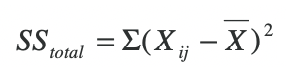
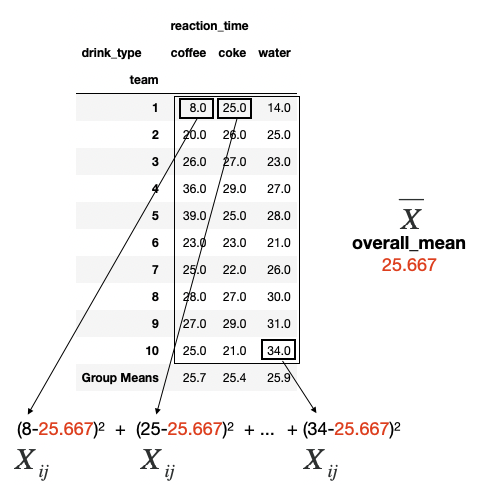

In [20]:
SS_total = ((df2-overall_mean)**2).sum().sum()
SS_total

1002.6666666666667

**4. Calcular la suma de los cuadrados de cada grupo**
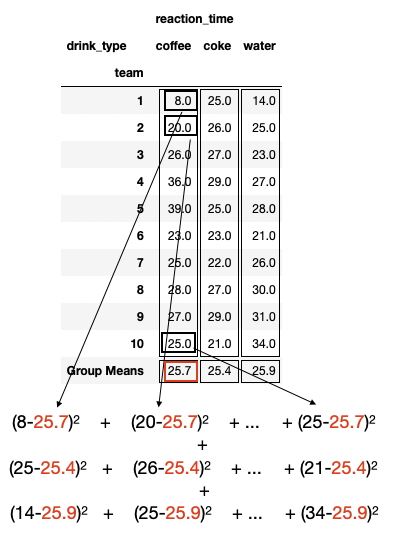

In [22]:
SS_within = ((df2-group_means)**2).sum().sum()
SS_within

1001.4

**5. Calcular la suma de cuadrados de la media de los grupos**
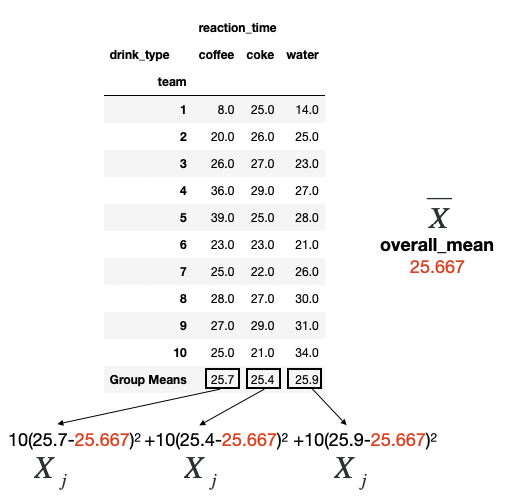

In [23]:
SS_between = df2.shape[0] * ((group_means-overall_mean)**2).sum()
SS_between

1.266666666666667

In [24]:
# Verificamos que SS_total = SS_between + SS_within
SS_total, (SS_between+SS_within)

(1002.6666666666667, 1002.6666666666666)

**5. Cálculo del estadístico**
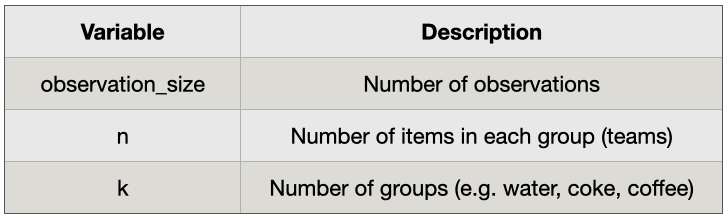

In [30]:
# Grados de libertad
observation_size = df.shape[0]
k = len(df.drink_type.unique())

df_total = observation_size -1 # 29
df_within = observation_size - k # 27
df_between = k - 1 # 2

df_total,df_within,df_between

(29, 27, 2)

In [31]:
# Calculamos los valores
mean_sq_between = SS_between / (k-1) # 0.6333
mean_sq_within = SS_within / (observation_size-k) # 37.08

mean_sq_between, mean_sq_within

(0.6333333333333335, 37.08888888888889)

El estadístico **F-value** es el ratio de dos varianzas

In [32]:
F = mean_sq_between / mean_sq_within
F

0.017076093469143204

**6. Buscamos el valor crítico en la distribución del estadístico**  
Podemos buscarlo en esta [tabla](http://www.socr.ucla.edu/Applets.dir/F_Table.html), para df1 = 2 (df_between) y df2 = 27 (df_within)

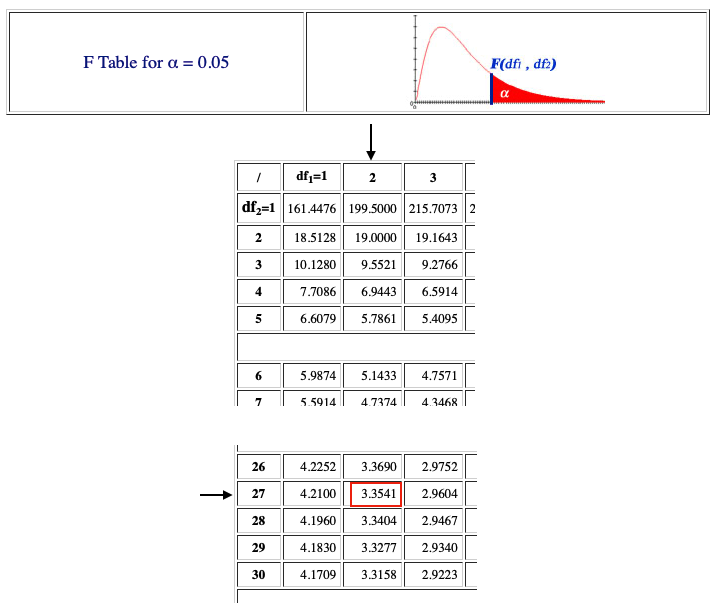  

El valor crítico es $3.3541$. Como el valor del estadístico calculado, $0.0171$, es inferior al valor crítico, no podemos rechazar la hipótesis nula ni afirmar que existe relación entre ambas variables

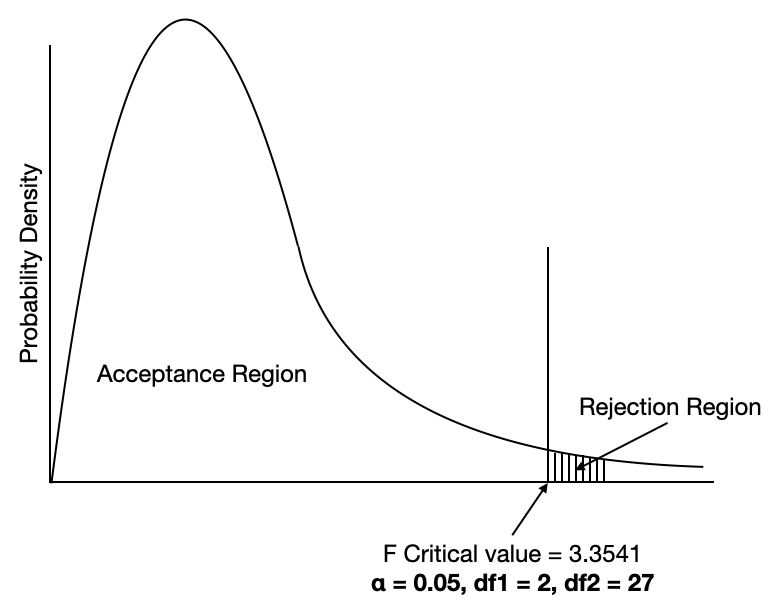

Como siempre, es más cómodo utilizar una librería de Python que realice todos estos cálculos. En este caso, la función `f_oneway` de la librería `scipy.stats` permite realizar el test ANOVA

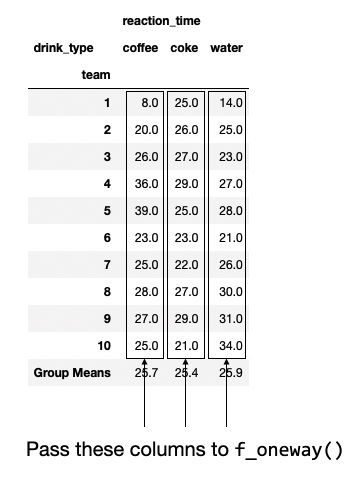

In [33]:
df2

reaction_time           
drink_type        coffee coke water
team                               
1                      8   25    14
2                     20   26    25
3                     26   27    23
4                     36   29    27
5                     39   25    28
6                     23   23    21
7                     25   22    26
8                     28   27    30
9                     27   29    31
10                    25   21    34

In [40]:
import scipy.stats as stats

stats.f_oneway(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2])

F_onewayResult(statistic=0.0170760934691432, pvalue=0.9830794846682348)

# Correlación

Un coeficiente de correlación mide el grado en que dos variables numéricas tienden a cambiar al mismo tiempo. El coeficiente describe tanto la fuerza como la dirección de la relación. 
  
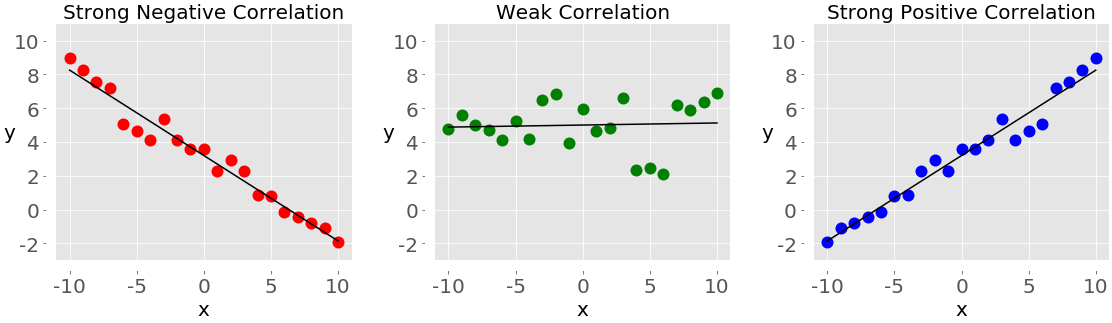


Existen tres tipos de correlación: Pearson (la más utilizada), Spearman y Kendall

**Correlación de Pearson**
Evalúa la relación **lineal** entre ambas variables. Una relación es lineal cuando un cambio en una variable se asocia con un cambio proporcional en la otra variable.  
  
**Correlación de Spearman**  
Evalúa la relación monótona entre dos variables continuas u ordinales. En una relación monótona, las variables tienden a cambiar al mismo tiempo, pero no necesariamente a un ritmo constante. El coeficiente de correlación de Spearman se basa en los valores jerarquizados de cada variable y no en los datos sin procesar.
La correlación de Spearman suele utilizarse para evaluar relaciones en las que intervienen variables ordinales. Por ejemplo,  evaluar si el orden en que los empleados completan un ejercicio de prueba se relaciona con el número de meses que han estado trabajando en la empresa.

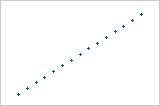
$$Pearson = +1, Spearman = +1$$

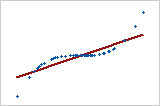
$$Pearson = +0.851, Spearman = +1$$

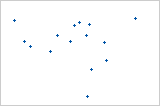
$$Pearson = −0.093, Spearman = −0.093$$


**Correlación de Kendall**  
Suele utilizarse en lugar de la de Spearman cuando tenemos pocos datos



In [42]:
import yfinance as yf
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")

aapl = yf.Ticker("AAPL")
hist2 = aapl.history(period="max")

sp500 = yf.Ticker("^GSPC")
hist3 = sp500.history(period="max")

In [49]:
data = hist[['Close']].merge(hist2[['Close']],left_index=True,right_index=True).merge(hist3[['Close']],
                                                                              left_index=True,right_index=True)

data.columns = ['Microsoft','Apple','SP500']
data

,Microsoft,Apple,SP500
Date,,,
1986-03-13 00:00:00-05:00,0.060980,0.085978,233.190002
1986-03-14 00:00:00-05:00,0.063158,0.090755,236.550003
1986-03-17 00:00:00-05:00,0.064247,0.090320,234.669998
1986-03-18 00:00:00-05:00,0.062613,0.093361,235.779999
1986-03-19 00:00:00-05:00,0.061524,0.092058,235.600006
...,...,...,...
2022-11-04 00:00:00-04:00,221.389999,138.380005,3770.550049
2022-11-07 00:00:00-05:00,227.869995,138.919998,3806.800049
2022-11-08 00:00:00-05:00,228.869995,139.500000,3828.110107


In [50]:
data.corr() # Por defecto es Pearson

,Microsoft,Apple,SP500
Microsoft,1.000000,0.985004,0.922946
Apple,0.985004,1.000000,0.897448
SP500,0.922946,0.897448,1.000000


In [51]:
data.corr(method='spearman')

,Microsoft,Apple,SP500
Microsoft,1.000000,0.858611,0.980974
Apple,0.858611,1.000000,0.849395
SP500,0.980974,0.849395,1.000000


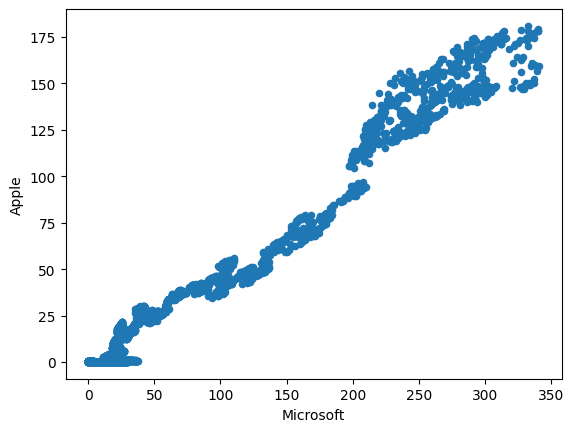

In [53]:
data.plot.scatter(x='Microsoft',y='Apple');

In [55]:
# Significancia de la correlación
from scipy.stats import pearsonr
pearsonr(data['Microsoft'],data['Apple'])

PearsonRResult(statistic=0.9850036495580945, pvalue=0.0)

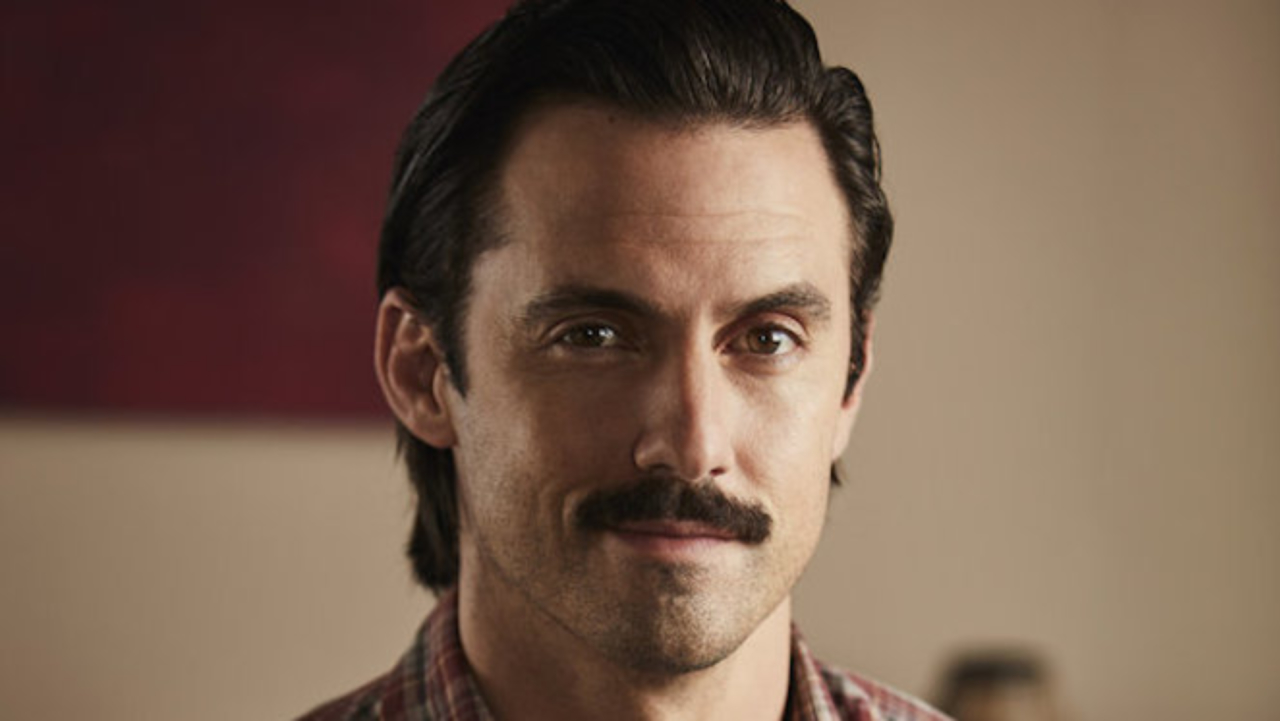